<a href="https://colab.research.google.com/github/jerellm/Music-80L/blob/master/Project_2_Sonic_Tide_Pools%2C_Jerell_Macaraeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Sonic Tide Pools
In this project we'll use a genetic algorithm guided by user feedback to evolve some electronically synthesized sounds. Please see the Assignment page on Canvas for project instructions.

## Setup
Install external libraries and import them into your notebook session.

In [0]:
# install external libraries for sound playback
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [0]:
# imports
import mai
import mai.synths
import mai.genalg
import mai.musifuncs as mf
import IPython.display
import time
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


## About Feedback FM Synthesis

For this project, we'll extend our previous frequency modulation synth from Tutorial 5.2 to a complex system of two oscillators coupled through frequency modulation, called *coupled FM*. The idea is that each osillator simultaneously modulates the frequency of the other in a cross coupled feedback loop (diagram below). Our feedback FM synthesizer `mai.synths.feedback_fm()` has 8 parameters that together determine the resulting sounds:
* `gain1` is feedback gain 1
* `gain2` is feedback gain 2
* `modulator1` is modulator 1 frequency (in hertz)
* `carrier1` is carrier 1 frequency (in hertz)
* `modulator2` is modulator 2 frequency (in hertz)
* `carrier2` is carrier 2 frequency (in hertz)
* `index1` is index start
* `index2` is index end

![cross-coupled FM](https://raw.githubusercontent.com/davidkant/aim80L/master/resources/img/coupled_fm_cross.png =350x)






Here is an example of how to set and the function arguments and call the function.

In [0]:
# synthesize audio using FM synthesis
y = mai.synths.feedback_fm(gain1=0.5, 
                           gain2=0.6, 
                           carrier1=300,
                           modulator1=600,
                           carrier2=400,
                           modulator2=700,
                           index1=1,
                           index2=6)

# play it
IPython.display.Audio(y.T, rate=44100, autoplay=False)

# Part 1: Create a custom GA
First, create a default `GeneticAlgothim()`.  

In [0]:
# create a genetic algorithm object
ga = mai.genalg.GeneticAlgorithm()

### Define a custom genotype
Write a custom function `random_individual()` to generate a random genotype. Since our FM synth has 8 parameters, your genotype will be a list of 8 floating point numbers, each between `0.0` and `1.0`. Finish the function below by completing each of the two numbered sections.
1. First create a list of 8 random floating point numbers between `0.0` and `1.0,` called `genotype`.
2. Then return it using the `return` statement — all you have to do is write `return genotype`.

In [0]:
def random_individual():
  
  # 1. create a random genotype
  genotype = [random.random() for i in range(8)]
  
  # 2. return it
  return genotype

# overwrite default function 
ga.random_individual = random_individual

### Define a custom phenotype
Write a custom `to_phenotype()` function to turn a given genotype into sound using the coupled FM synthesis model `mai.syntes.feedback_fm()`. Finish the function below by completing each of the three numbered sections.
3. First scale the genotype values to appropriate ranges using `mf.scale()`. 
4. Then synthesize sound passing the scaled values as arguments to  `mai.synths.feedback_fm()`.
5. Return the synthesized sound using the `return` statement — just write `return y`.

Use `mf.scale()` to scale the normalized genotype values to parameter ranges indicated below. The function `mf.scale()` takes four arguments: the value to scale, the lower bound, and the upper bound, as well as a keyword `kind` which should be set to either `'lin'` or `'exp'` for linear or exponential scaling. The first value `gain1` is done as an example below.
  - `gain1` should be between 0 and 1, linear scale
  - `gain2` should be between 0 and 1, linear scale
  - `carrier1` should be between 1 and 5000, exponential scale
  -  `modulator1` should be between 1 and 5000, exponential scale
  - `carrier2` should be between 1 and 5000, exponential scale
  - `modulator2` should be between 1 and 5000, exponential scale
  - `index1` should be between 0.1 and 50, exponential scale
  - `index2` should be between 0.1 and 50, exponential scale

In [0]:
def to_phenotype(genotype):

  # 3. scale genotype values
  gain1 = mf.scale(genotype[0], 0, 1, kind='lin')
  gain2 = mf.scale(genotype[1], 0, 1, kind='lin')
  carrier1 = mf.scale(genotype[2], 1, 5000, kind='exp')
  modulator1 = mf.scale(genotype[3], 1, 5000, kind='exp')
  carrier2 = mf.scale(genotype[4], 1, 5000, kind='exp')
  modulator2 = mf.scale(genotype[5], 1, 5000, kind='exp')
  index1 = mf.scale(genotype[6], 0.1, 50, kind='exp')
  index2 = mf.scale(genotype[7], 0.1, 50, kind='exp')
 
  # 4. synthesize audio using feedback FM synthesis
  y = mai.synths.feedback_fm(gain1, 
                            gain2, 
                            carrier1,
                            modulator1,
                            carrier2,
                            modulator2,
                            index1,
                            index2)
  
  # 5. return synthesized audio
  return y

# overwrite default function 
ga.to_phenotype = to_phenotype

# Part 2:  Evolve Sounds
Now that we're all setup, we can use our custom GA to evolve some sounds. We will initialize a random population, listen, assign fitness scores, evolve the next generation, and repeat!

## Step 1: Initialize random population
First construct an initial random population. You can change the size of the population by adjusting the value of the argument `population_size`.

In [0]:
# initialize random population
ga.initialize_population(population_size=10)

This cell plots genotypes for all of the individuals. Use it to see how much genetic diversity there is in the population.

individual 0


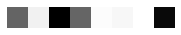

individual 1


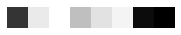

individual 2


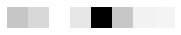

individual 3


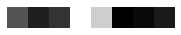

individual 4


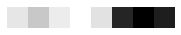

individual 5


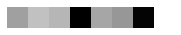

individual 6


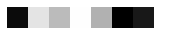

individual 7


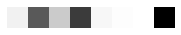

individual 8


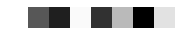

individual 9


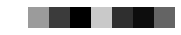

In [0]:
# loop through entire popularion
for i,genotype in enumerate(ga.population):

  print('individual {0}'.format(i))
  mai.genalg.plot_genotype(genotype)

## Step 2: Convert to phenotype and listen
Now we want to listen to each individual and evaluate its fitness. This cell converts each genotype to sound. Play them by clicking play on each media player widget.

individual 0


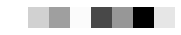

individual 1


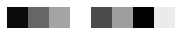

individual 2


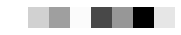

individual 3


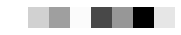

individual 4


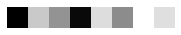

individual 5


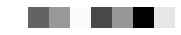

individual 6


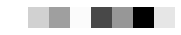

individual 7


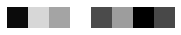

individual 8


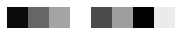

individual 9


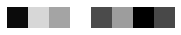

In [0]:
# loop through entire popularion
for i,genotype in enumerate(ga.population):

  print('individual {0}'.format(i))
  mai.genalg.plot_genotype(genotype)
    
  # convert to phenotype
  y = ga.to_phenotype(genotype)
    
  # play it
  d = IPython.display.Audio(y.T, rate=44100, autoplay=False)
  IPython.display.display(d)

## Step 3: Set fitness scores
Set fitness scores for each individual. Remember, this must be a value between 0 and 1!

In [0]:
# set fitness scores
ga.fitness[0][0] = 0
ga.fitness[1][0] = 0
ga.fitness[2][0] = 0
ga.fitness[3][0] = 0
ga.fitness[4][0] = 0
ga.fitness[5][0] = 0
ga.fitness[6][0] = 0
ga.fitness[7][0] = 0
ga.fitness[8][0] = 1
ga.fitness[9][0] = 0

## Step 4. Evolve the next generation
Once the fitness scores are set you can evolve the next generation. You can adjust the mutation probability  by changing the value of the argument `mutation_prob`, but set it to a value between `0.0` and `1.0`!

In [0]:
# evolve next generation
ga.evolve_once(mutation_prob=1.0)

-> muuuuutating individual [0.962979380148419, 0.6918618589317805, 0.49188796911240007, 0.06901618306737212, 0.7838157039998291, 0.51203191961036, 0.9997137864386922, 0.20756518959027848]
-> muuuuutating individual [0.962979380148419, 0.6918618589317805, 0.49188796911240007, 0.06901618306737212, 0.7838157039998291, 0.51203191961036, 0.9997137864386922, 0.20756518959027848]
-> muuuuutating individual [0.962979380148419, 0.6918618589317805, 0.49188796911240007, 0.06901618306737212, 0.7838157039998291, 0.51203191961036, 0.9997137864386922, 0.20756518959027848]
-> muuuuutating individual [0.962979380148419, 0.6918618589317805, 0.49188796911240007, 0.06901618306737212, 0.7838157039998291, 0.51203191961036, 0.9997137864386922, 0.20756518959027848]
-> muuuuutating individual [0.962979380148419, 0.6918618589317805, 0.49188796911240007, 0.06901618306737212, 0.7838157039998291, 0.51203191961036, 0.9997137864386922, 0.20756518959027848]
-> muuuuutating individual [0.962979380148419, 0.69186185893

## Repeat! 
Continue to evolve generations by looping back to **Step 2** and repeating. **Note:** repeats **Steps 2-4** to evolve new generations that build on the previous. Loop all the way back to **Step 1** to initialize a new population when you are ready to start a new search.